# YOUR PROJECT TITLE

Imports and set magics:

In [1]:
#pip install pandasdmx
#pip install geopandas

In [2]:
import pandas as pd
import pandasdmx as pdmx
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import geopandas as gpd
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

/Users/claraengelund/anaconda3/lib/python3.11/site-packages/pandasdmx/remote.py:11: RuntimeWarning: optional dependency requests_cache is not installed; cache options to Session() have no effect
  warn(


# Read and clean data

Write something about the datasets. 

Importing data on employment rates

In [3]:
emplrate = dataproject.fetching_data_emplrate()
emplrate.head()

,LOCATION,SUBJECT,MEASURE,FREQUENCY,TIME_PERIOD,value
0,AUS,LREM64FE,STSA,A,2008,66.71808
1,AUS,LREM64FE,STSA,A,2009,66.30235
2,AUS,LREM64FE,STSA,A,2010,66.14607
3,AUS,LREM64FE,STSA,A,2011,66.65070
4,AUS,LREM64FE,STSA,A,2012,66.57001


Cleaning the data

In [4]:
#Drop measure and frequency
emplrate.drop(['MEASURE', 'FREQUENCY'], axis=1, inplace=True) 

#Rename 
emplrate.rename(columns = {'TIME_PERIOD':'YEAR', 'value':'EMPLRATE'}, inplace=True)
emplrate['SUBJECT'].replace({'LREM64FE': 'Female', 'LREM64MA': 'Male', 'LREM64TT': 'All'}, inplace=True)
emplrate

,LOCATION,SUBJECT,YEAR,EMPLRATE
0,AUS,Female,2008,66.71808
1,AUS,Female,2009,66.30235
2,AUS,Female,2010,66.14607
3,AUS,Female,2011,66.65070
4,AUS,Female,2012,66.57001
...,...,...,...,...
1711,CRI,All,2019,61.64743
1712,CRI,All,2020,54.83073
1713,CRI,All,2021,57.15372
1714,CRI,All,2022,60.05968


Importing data on average hours worked per person employed

In [5]:
hours = dataproject.fetching_data_hours()
hours.head()

,LOCATION,SUBJECT,MEASURE,TIME_PERIOD,value
0,AUS,T_HRSAV,PEHRS,2008,1753.556685
1,AUS,T_HRSAV,PEHRS,2009,1779.140915
2,AUS,T_HRSAV,PEHRS,2010,1755.149446
3,AUS,T_HRSAV,PEHRS,2011,1771.541297
4,AUS,T_HRSAV,PEHRS,2012,1759.612242


Cleaning the data

In [6]:
#Drop subject and measure
hours.drop(['SUBJECT', 'MEASURE'], axis=1, inplace=True) 

#Rename 
hours.rename(columns = {'TIME_PERIOD':'YEAR', 'value':'AVHRS'}, inplace=True)
hours

,LOCATION,YEAR,AVHRS
0,AUS,2008,1753.556685
1,AUS,2009,1779.140915
2,AUS,2010,1755.149446
3,AUS,2011,1771.541297
4,AUS,2012,1759.612242
...,...,...,...
563,COL,2018,2385.939332
564,COL,2019,2382.611241
565,COL,2020,2069.438776
566,COL,2021,2405.385474


## Explore each data set

An interactive plot illustrates the employments rates of 2022 across OECD countries with a drop down menu that enables the graph to show employment rates for males, females and all, respectively.

In [7]:
# Import world map data
worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

def create_map(gender):
    # Looking at employment rates in 2022
    emplrate_map = emplrate[(emplrate['SUBJECT'] == gender) & (emplrate['YEAR'] == '2022')]

    # Merge employment rate data and world map data
    mapdata = pd.merge(worldmap, emplrate_map, how="left", left_on='iso_a3', right_on='LOCATION')

    # Plot the map
    fig, ax = plt.subplots(1, 1, figsize=(20, 16))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad="0.5%")
    mapdata.plot(column="EMPLRATE", ax=ax, cax=cax, cmap='OrRd', legend=True, legend_kwds={"label": f"Employment rate in 2022 for {gender}"}, missing_kwds={'color':'lightgrey'}, vmin=45, vmax=85)
    ax.set_title(f'Employment rate for OECD countries in 2022', size=20)
    plt.show()

# Dropdown menu 
gender_dropdown = widgets.Dropdown(options=['All', 'Male', 'Female'], value='All', description='Gender:')
widgets.interactive(create_map, gender=gender_dropdown)

/var/folders/8n/0s_l94vx4jd99236nyjdnytw0000gn/T/ipykernel_51461/3526636779.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


interactive(children=(Dropdown(description='Gender:', options=('All', 'Male', 'Female'), value='All'), Output(…

Vi mangler mere deskriptiv statistik og det kunne være nice at lave noget med det der split-and-apply - fx nogle genenmsnit for alle EU lande eller på tværs af køn - I dont know. 

# Merge data sets

Merge the datasets on employment rates and average hours per person employed in OECD countries. We do an inner merge as we only want to keep observations where both an employment rate and average labour hours exists. Therefore we also loose some observations. 

In [8]:
#Merge the two dataset
data_merged = pd.merge(emplrate,hours,how='inner',on=['LOCATION','YEAR'])
data_merged

,LOCATION,SUBJECT,YEAR,EMPLRATE,AVHRS
0,AUS,Female,2008,66.71808,1753.556685
1,AUS,Male,2008,79.68430,1753.556685
2,AUS,All,2008,73.20431,1753.556685
3,AUS,Female,2009,66.30235,1779.140915
4,AUS,Male,2009,77.78976,1779.140915
...,...,...,...,...,...
1684,CRI,Male,2021,70.10255,2080.563075
1685,CRI,All,2021,57.15372,2080.563075
1686,CRI,Female,2022,47.06725,2155.727768
1687,CRI,Male,2022,72.85931,2155.727768


# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

Graph that shows that average hours worked are declining over time for DK. Måske lav den som en drop down widget så man kan vælge landet

Graph that plots employment rate against average working hours for all OECD countries to show that even though DK has low average working hours we have a high employment rate.

<Axes: xlabel='EMPLRATE', ylabel='AVHRS'>

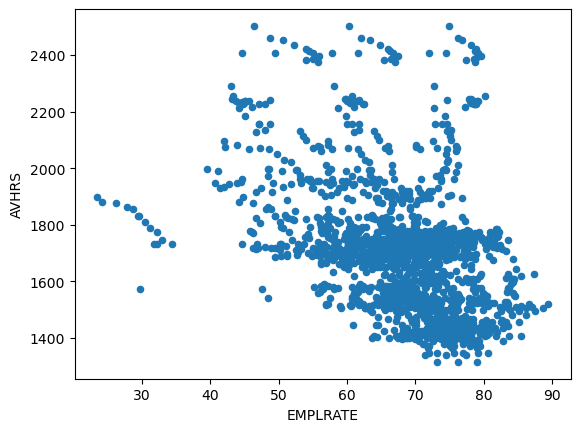

In [9]:
data_merged.plot.scatter(x='AVHRS', y='EMPLRATE')

Perhaps a graph showing that the female employment rate is especially large in DK compared to other countries. 

# Conclusion

ADD CONCISE CONLUSION.